# **4) WEATHER AUS**

In [273]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler  
import random
import seaborn as sns

Utilizo la librería Pandas para abrir el archivo

In [274]:
w_AUS = pd.read_csv(r"https://raw.githubusercontent.com/KevinFDI/IML_Practica_2/main/datasets/weatherAUS.csv")

Veo la dimensión del dataset.shape

In [275]:
w_AUS.shape

(145460, 24)

# **A. LIMPEZA DEL DATASET**

In [276]:
w_AUS.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [277]:
w_AUS.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Sumo los valores nulos de cada columna

In [278]:
w_AUS.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RISK_MM           3267
RainTomorrow      3267
dtype: int64

**ELIMINO LOS VALORES NULOS**

In [279]:
w_AUS.dropna(inplace=True)

Compruebo que se hayan eliminado

In [280]:
w_AUS.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

In [281]:
w_AUS.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0.0,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0.0,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0.0,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0.0,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0.0,No
6055,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,...,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,0.0,No
6056,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,...,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,0.0,No
6057,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,...,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,No,0.0,No
6058,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,...,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No,0.0,No
6059,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,NE,41.0,NNE,...,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,No,0.0,No


Veo la dimensión del dataset.shape una vez eliminados los valores nulos

In [282]:
w_AUS.shape

(56420, 24)

# **B. FILTRO COLUMNAS**

Filtro columnas para que queden sólo las siguientes variables: Rainfall, WindGustSpeed, WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm.

In [283]:
# Elimino las que no voy a utilizar. 
w_AUS_filtro = w_AUS.drop(["Date", "Location", "MinTemp", "MaxTemp", "Evaporation", "Sunshine", "WindGustDir", "WindDir9am", "WindDir3pm", "Cloud9am", "Cloud3pm", "RainToday", "RISK_MM", "RainTomorrow"], axis=1)

# También se podría haber hecho lo siguiente:
    # w_AUS_filtro = w_AUS.get(["Rainfall", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Temp9am", "Temp3pm"])


MATRIZ DE CORRELACIÓN

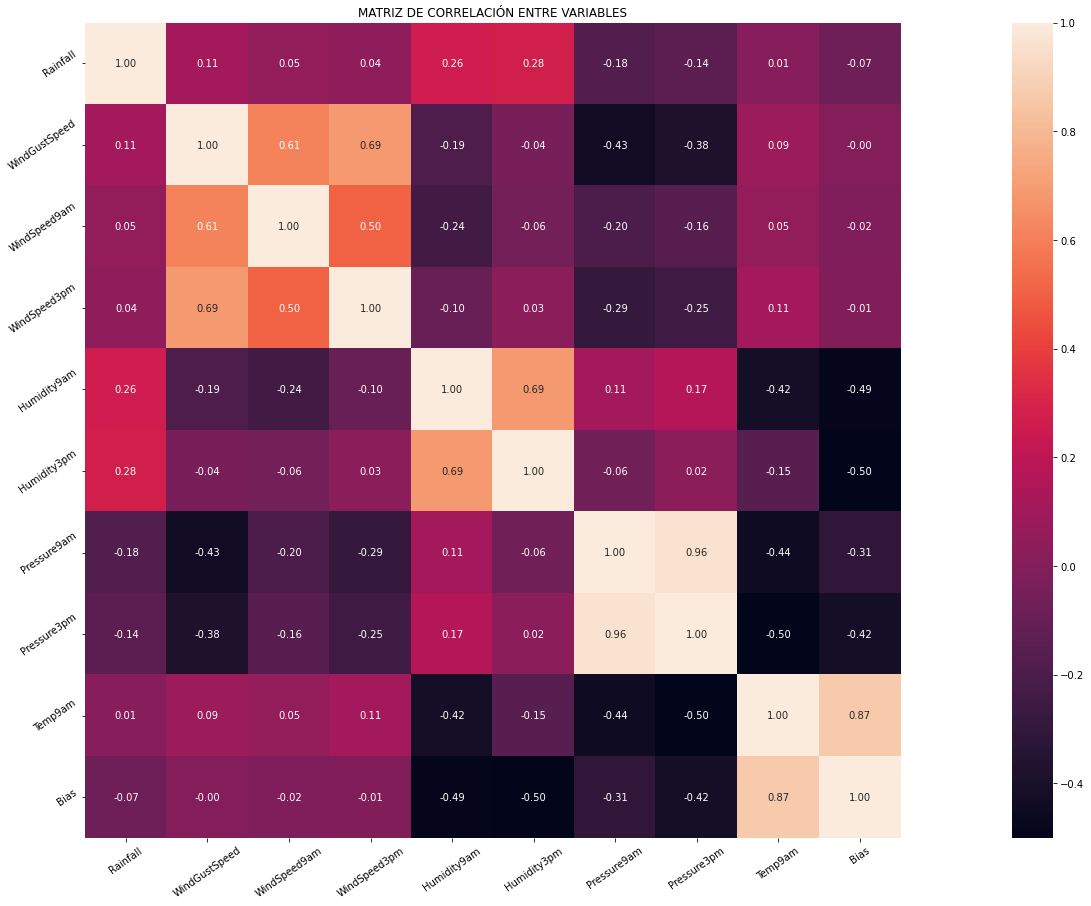

In [293]:
w_AUS_filtro.corr()
correlation = w_AUS_filtro.corr()
plt.figure(figsize=(40,15))
plt.title('MATRIZ DE CORRELACIÓN ENTRE VARIABLES')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=35)
ax.set_yticklabels(ax.get_yticklabels(), rotation=35)           
plt.show()

**OBSERVACIÓN**:

Temp9am, Temp3pm están altamente correlacionados positivamente.

Pressure3pm y Pressure9am también.

Compruebo que sean todos número para poder normalizar los datos

In [285]:
round(w_AUS_filtro.describe(), 2)

,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,56420.00,56420.00,56420.00,56420.00,56420.00,56420.0,56420.00,56420.00,56420.00,56420.00
mean,2.13,40.88,15.67,19.79,65.87,49.6,1017.24,1014.80,18.20,22.71
std,7.01,13.34,8.32,8.51,18.51,20.2,6.91,6.87,6.57,6.84
min,0.00,9.00,2.00,2.00,0.00,0.0,980.50,977.10,-0.70,3.70
25%,0.00,31.00,9.00,13.00,55.00,35.0,1012.70,1010.10,13.10,17.40
50%,0.00,39.00,15.00,19.00,67.00,50.0,1017.20,1014.70,17.80,22.40
75%,0.60,48.00,20.00,26.00,79.00,63.0,1021.80,1019.40,23.30,27.90
max,206.20,124.00,67.00,76.00,100.00,100.0,1040.40,1038.90,39.40,46.10


**NORMALIZO**

Tres alternativas:

1. Normalizo utilizando StandardScaler()
NORMALIZAR= 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(w_AUS_filtro)  
    w_AUS_filtro= scaler.transform(w_AUS_filtro)

2. Normalizo con zcore: w_AUS_norm1 = (x - x.mean()) / x.std();

3. Normalizo con min y max. ej.: x_AUS_norm2 = (x - x.min()) / (x.max() - x.min())

# **C. PREDIGO LAS DIFERENTES VARIABLES DE FORMA INDIVIDUAL**

# **D. ANALIZO QUE VARIABLE ES MÁS INFLUYENTE PARA CADA FEATURE**

# 1. RAINFALL

DEFINO LAS VARIABLES DE LOS DATASETS PARA NORMALIZARLOS

In [286]:
x1 = w_AUS_filtro.drop("Rainfall", axis=1)
y1 = w_AUS_filtro['Rainfall']
n, d = x1.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

NORMALIZAR= 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x1)  
    x1= scaler.transform(x1)

El dataset tiene 56420 registros, de 9 dimensiones


ENTRENO EL MODELO DE REGRESIÓN LINEAL

In [287]:
modelo = LinearRegression()

modelo.fit(x1, y1)

y1_predict= modelo.predict(x1)

mse_error1 = mean_squared_error(y1_predict, y1)
print("Error cuadrático medio: %.2f" % mse_error1)

mae_error1 = mean_absolute_error(y1_predict, y1)
print("Error absoluto medio: %.2f" % mae_error1)

r2_s1 = r2_score(y1, y1_predict) # Devuelve como se ajustan estas dos variables.
print("r2_score: %.2f" % r2_s1)

Error cuadrático medio: 42.26
Error absoluto medio: 3.12
r2_score: 0.14


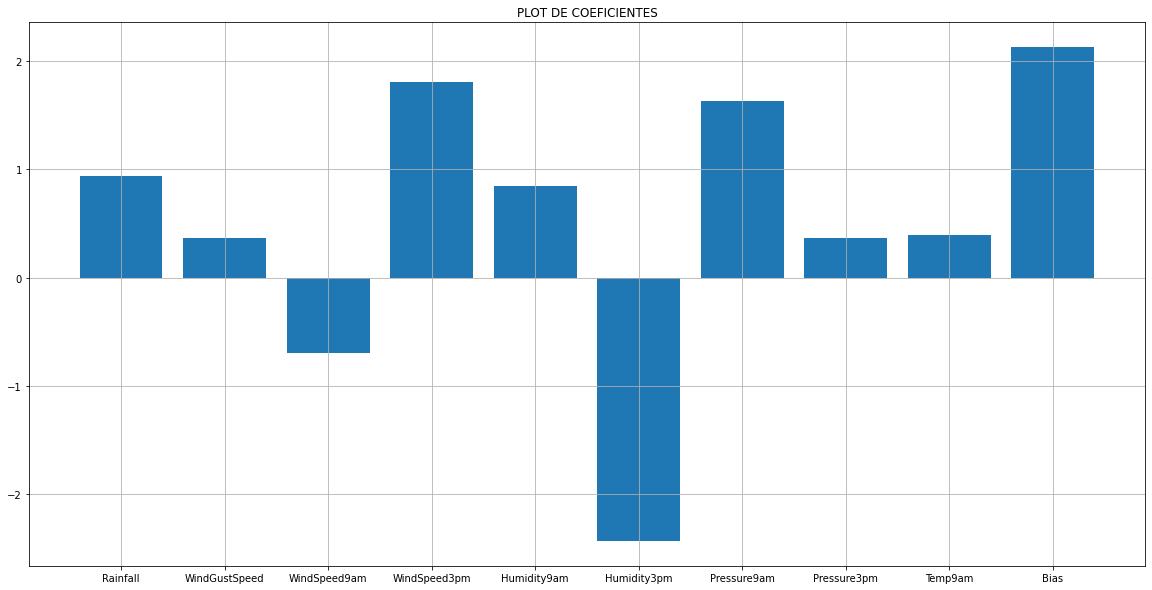

In [288]:
w1 = modelo.coef_
b1 = modelo.intercept_
d1 = x1.shape[1]
plt.figure(figsize=(20,10))
plt.bar(range(d1+1), np.concatenate((w1,[b1])));
labels1 = w_AUS_filtro.columns.values; labels1[-1]= 'Bias'
plt.xticks(range(w1.shape[0]+1), labels1, rotation= 0)
plt.grid()
plt.title("PLOT DE COEFICIENTES");


**OBSERVACIÓN:** Como se observa en el grádico, las variables más influyentes para la predicción son:

*   Humidity3pm
*   WindGustSpeed
*   Pressure9am

<Figure size 432x288 with 0 Axes>

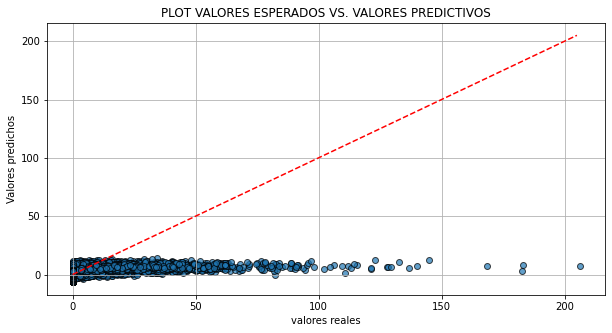

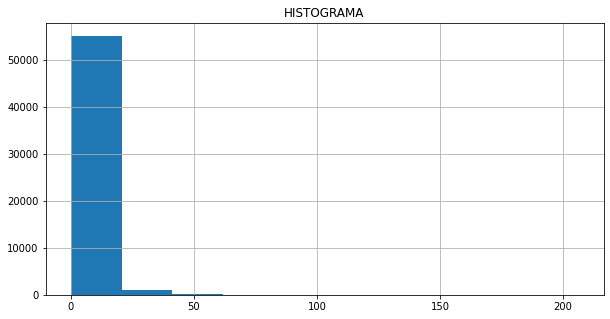

In [289]:
plt.figure();
xx1 = range(round(y1.min()),round(y1.max()))
plt.figure(figsize=(10,5));
plt.scatter(y1, y1_predict,alpha=0.7, edgecolor='k'), plt.grid();
plt.plot(xx1, xx1, 'r--');
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

plt.figure(figsize=(10,5));
w_AUS_filtro["Rainfall"].hist();
plt.title("HISTOGRAMA");


El modelo predecirá mejor los valores que se encuentren entre 0 y 25.

# 2. WINDGUSTSPEED

In [104]:
x2 = w_AUS_filtro.drop('WindGustSpeed', axis=1)
y2 = w_AUS_filtro['WindGustSpeed']
n, d = x2.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

NORMALIZAR= 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x2)  
    x2= scaler.transform(x2)

modelo = LinearRegression()

modelo.fit(x2, y2)

y2_predict= modelo.predict(x2)

mse_error2 = mean_squared_error(y2_predict, y2)
print("Error cuadrático medio: %.2f" % mse_error2)

mae_error2 = mean_absolute_error(y2_predict, y2)
print("Error absoluto medio: %.2f" % mae_error2)

r2_s2 = r2_score(y2, y2_predict)
print("r2_score: %.2f" % r2_s2)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 65.24
Error absoluto medio: 5.96
r2_score: 0.63


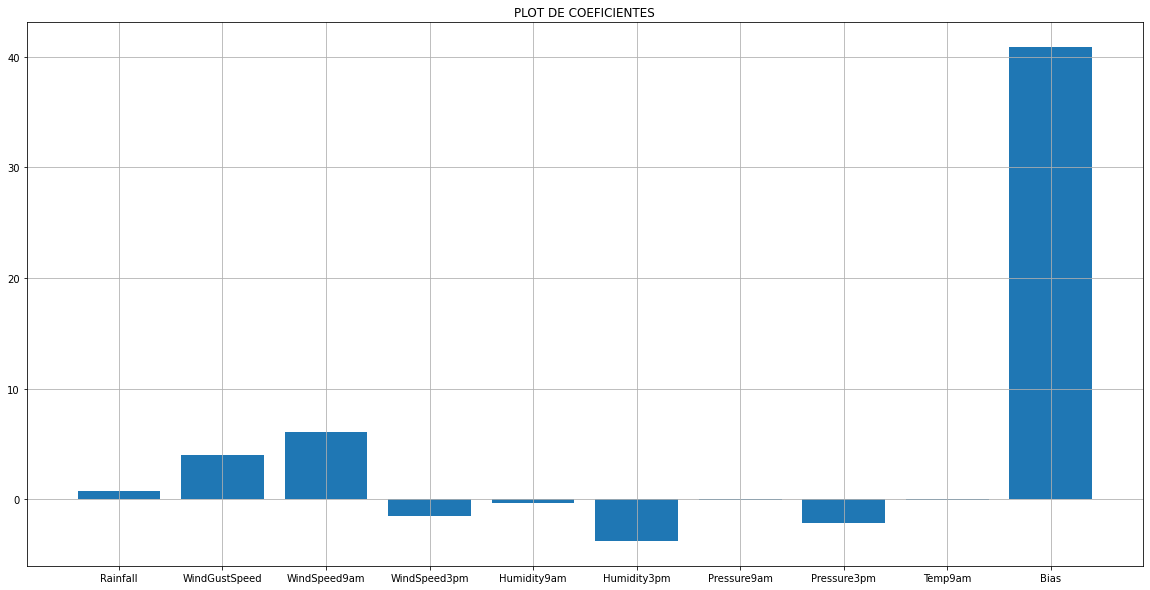

In [105]:
w2 = modelo.coef_
b2 = modelo.intercept_
d2 = x2.shape[1]
plt.figure(figsize=(20,10))
plt.bar(range(d+1), np.concatenate((w2,[b2])));
labels2 = w_AUS_filtro.columns.values; labels2[-1]= 'Bias'
plt.xticks(range(w2.shape[0]+1), labels2, rotation= 0)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

**OBSERVACIÓN:** Como se observa en el grádico, las variables más influyentes para la predicción son:

*   WindGustSpeed9am
*   WindGustSpeed
*   Humidity3pm

<Figure size 432x288 with 0 Axes>

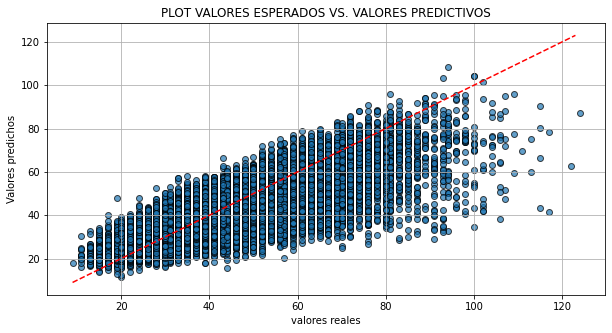

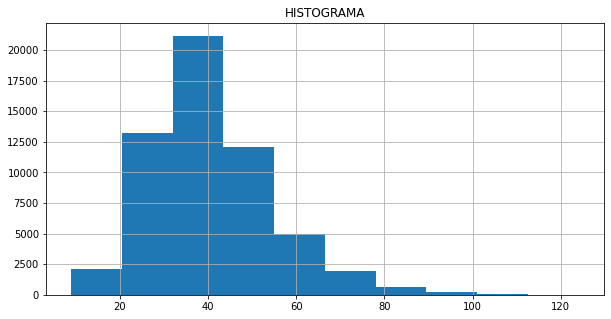

In [108]:
plt.figure()
xx2= range(round(y2.min()),round(y2.max()))
plt.figure(figsize=(10,5));
plt.scatter(y2, y2_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx2, xx2, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

plt.figure(figsize=(10,5));
w_AUS_filtro["WindGustSpeed"].hist();
plt.title("HISTOGRAMA");

El modelo predecirá mejor los valores que se encuentren entre 20 y 45 aproximadamente.

# 3. WINDSPEED9AM

In [151]:
x3 = w_AUS_filtro.drop('WindSpeed9am', axis=1)
y3 = w_AUS_filtro['WindSpeed9am']
n, d = x3.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

NORMALIZAR= 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x3)  
    x3= scaler.transform(x3)

modelo= LinearRegression()

modelo.fit(x3, y3)

y3_predict= modelo.predict(x3)

mse_error3 = mean_squared_error(y3_predict, y3)
print("Error cuadrático medio: %.2f" % mse_error3)

mae_error3 = mean_absolute_error(y3_predict, y3)
print("Error absoluto medio: %.2f" % mae_error3)

r2_s3 = r2_score(y3, y3_predict)
print("r2_score: %.2f" % r2_s3)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 40.06
Error absoluto medio: 4.96
r2_score: 0.42


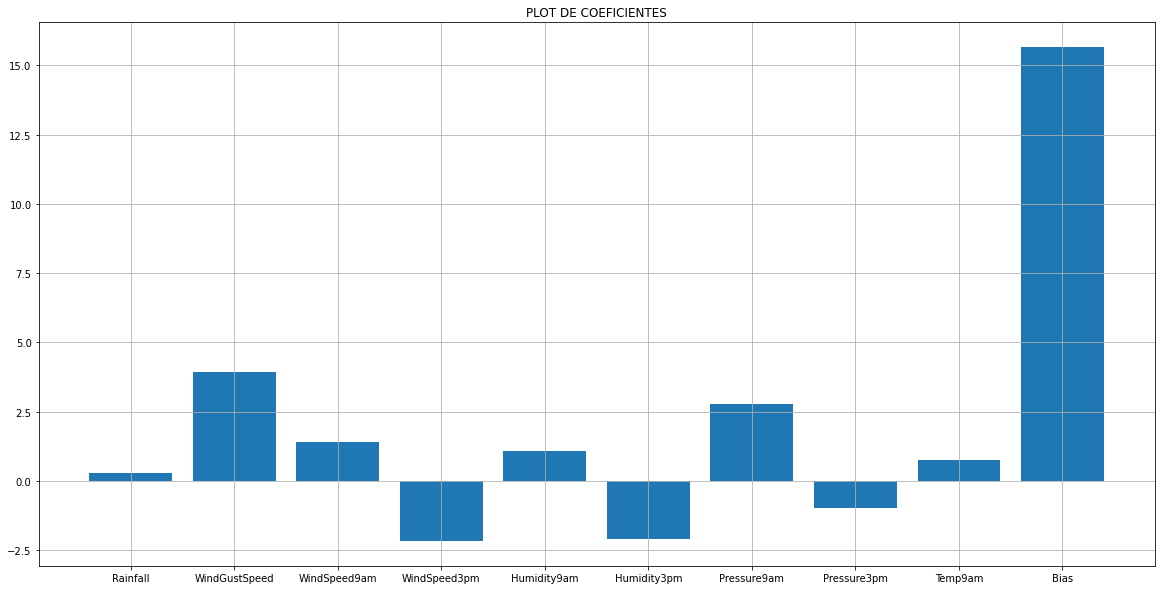

In [152]:
w3 = modelo.coef_
b3 = modelo.intercept_
d3 = x3.shape[1]
plt.figure(figsize=(20,10))
plt.bar(range(d3+1), np.concatenate((w3,[b3])));
labels3 = w_AUS_filtro.columns.values; labels3[-1]= 'Bias'
plt.xticks(range(w3.shape[0]+1), labels3, rotation= 0)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

**OBSERVACIÓN:** Como se observa en el grádico, las variables más influyentes para la predicción son:

*   WindGustSpeed
*   WindGustSpeed3pm
*   Pressure9am
*   Humidity3pm

<Figure size 432x288 with 0 Axes>

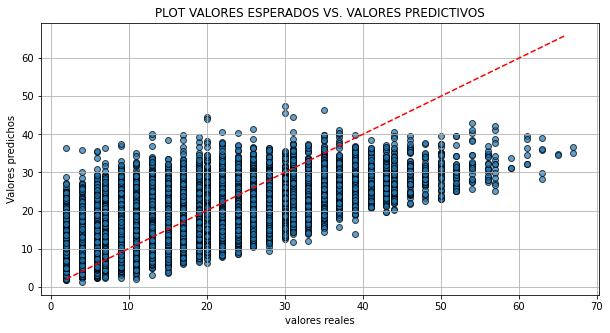

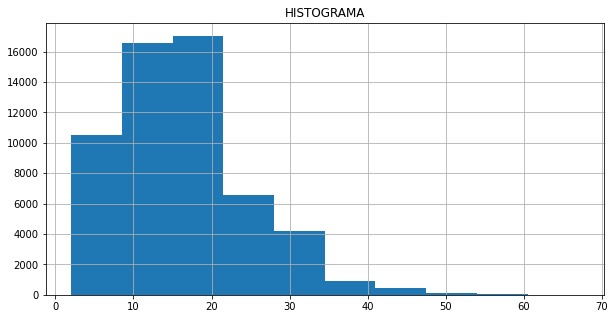

In [153]:
plt.figure()
xx3= range(round(y3.min()),round(y3.max()))
plt.figure(figsize=(10,5));
plt.scatter(y3, y3_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx3, xx3, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

plt.figure(figsize=(10,5));
w_AUS_filtro["WindSpeed9am"].hist();
plt.title("HISTOGRAMA");

El modelo predecirá mejor valores cercanos al siguiente rango: 5 y 35.

# 4. WINDSPEED3PM

In [167]:
x4 = w_AUS_filtro.drop('WindSpeed3pm', axis=1)
y4 = w_AUS_filtro['WindSpeed3pm']
n, d = x4.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

NORMALIZAR= 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x4)  
    x4= scaler.transform(x4)

modelo= LinearRegression()

modelo.fit(x4, y4)

y4_predict= modelo.predict(x4)

mse_error4 = mean_squared_error(y4_predict, y4)
print("Error cuadrático medio: %.2f" % mse_error4)

mae_error4 = mean_absolute_error(y4_predict, y4)
print("Error absoluto medio: %.2f" % mae_error4)

r2_s4 = r2_score(y4, y4_predict)
print("r2_score: %.2f" % r2_s4)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 35.39
Error absoluto medio: 4.62
r2_score: 0.51


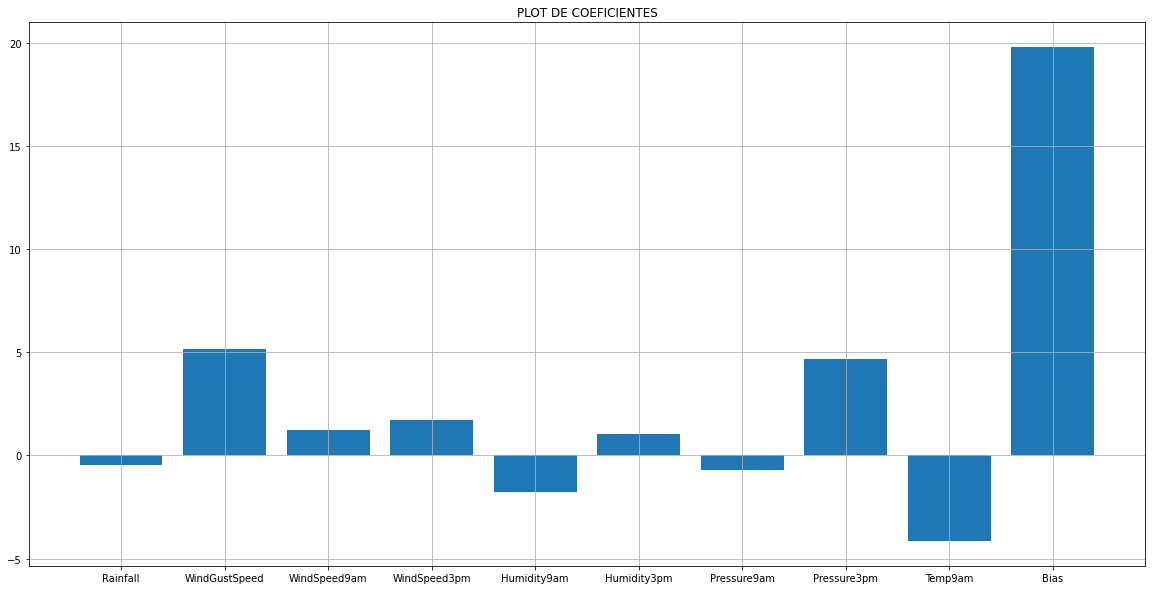

In [168]:
w4 = modelo.coef_
b4 = modelo.intercept_
d4 = x4.shape[1]
plt.figure(figsize=(20,10))
plt.bar(range(d4+1), np.concatenate((w4,[b4])));
labels4 = w_AUS_filtro.columns.values; labels4[-1]= 'Bias'
plt.xticks(range(w4.shape[0]+1), labels4, rotation= 0)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

**OBSERVACIÓN:** Como se observa en el grádico, las variables más influyentes para la predicción son:

*   WindGustSpeed
*   Pressure3pm
*   Temp9am

<Figure size 432x288 with 0 Axes>

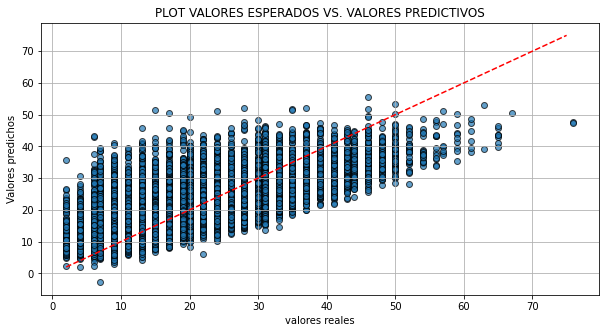

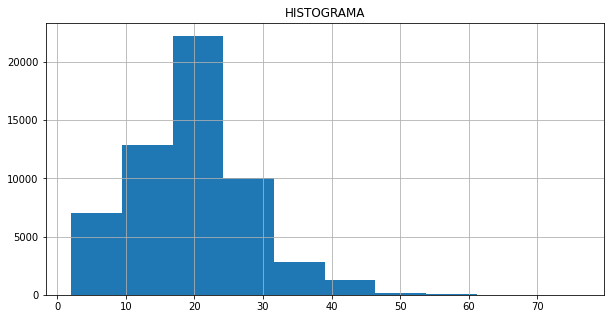

In [170]:
plt.figure()
xx4= range(round(y4.min()),round(y4.max()))
plt.figure(figsize=(10,5));
plt.scatter(y4, y4_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx4, xx4, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

plt.figure(figsize=(10,5));
w_AUS_filtro["WindSpeed3pm"].hist();
plt.title("HISTOGRAMA");

El modelo predecirá mejor los valores que se encuentren entre 10 y 30.

# 5. HUMIDITY9AM

In [184]:
x5 = w_AUS_filtro.drop('Humidity9am', axis=1)
y5 = w_AUS_filtro['Humidity9am']
n, d = x5.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

NORMALIZAR= 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x5)  
    x5= scaler.transform(x5)

modelo= LinearRegression()

modelo.fit(x5, y5)

y5_predict= modelo.predict(x5)

mse_error5 = mean_squared_error(y5_predict, y5)
print("Error cuadrático medio: %.2f" % mse_error5)

mae_error5 = mean_absolute_error(y5_predict, y5)
print("Error absoluto medio: %.2f" % mae_error5)

r2_s5 = r2_score(y5, y5_predict)
print("r2_score: %.2f" % r2_s5)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 94.13
Error absoluto medio: 7.48
r2_score: 0.73


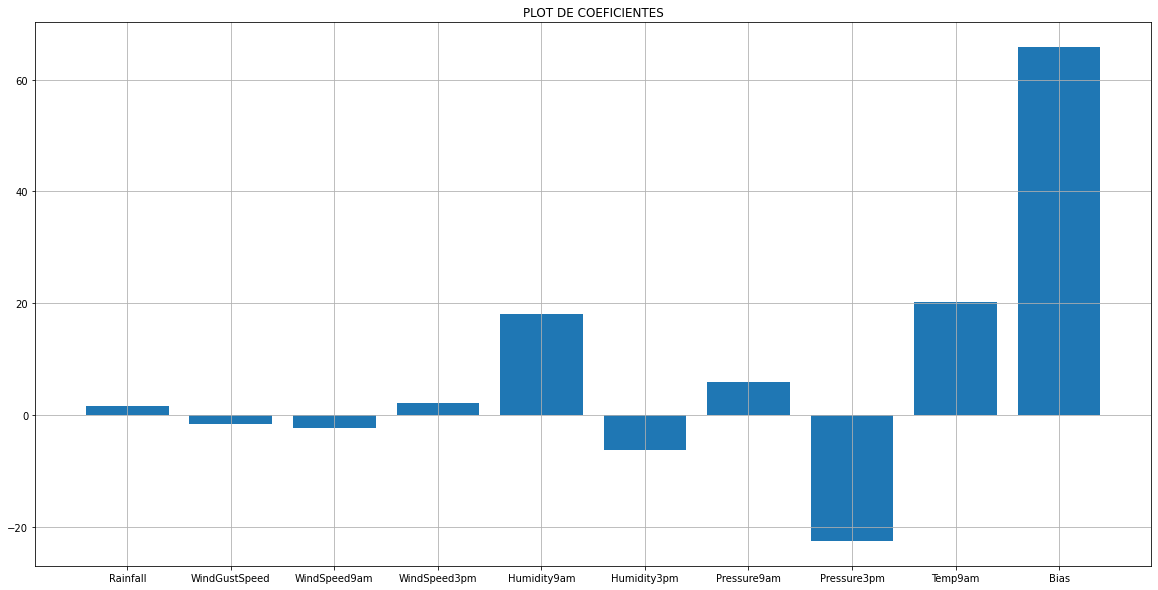

In [185]:
w5 = modelo.coef_
b5 = modelo.intercept_
d5 = x5.shape[1]
plt.figure(figsize=(20,10))
plt.bar(range(d5+1), np.concatenate((w5,[b5])));
labels5 = w_AUS_filtro.columns.values; labels5[-1]= 'Bias'
plt.xticks(range(w5.shape[0]+1), labels5, rotation= 0)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

**OBSERVACIÓN:** Como se observa en el grádico, las variables más influyentes para la predicción son:

*   Pressure3pm
*   Temp9am
*   Humidity9am

<Figure size 432x288 with 0 Axes>

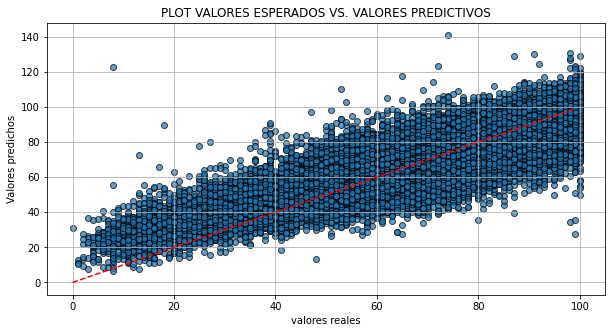

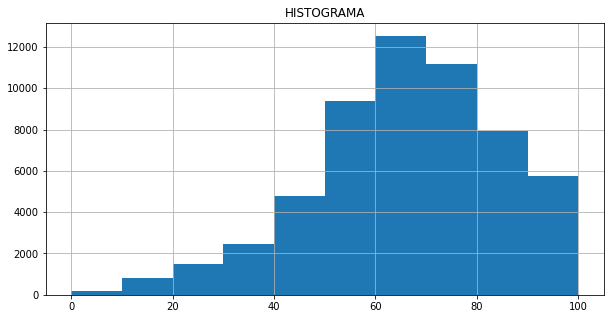

In [187]:
plt.figure()
xx5= range(round(y5.min()),round(y5.max()))
plt.figure(figsize=(10,5));
plt.scatter(y5, y5_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx5, xx5, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

plt.figure(figsize=(10,5));
w_AUS_filtro["Humidity9am"].hist();
plt.title("HISTOGRAMA");

El modelo predecirá mejor aquello valores que superen los 40.

# 6. HUMIDITY3PM

In [201]:
x6 = w_AUS_filtro.drop('Humidity3pm', axis=1)
y6 = w_AUS_filtro['Humidity3pm']
n, d = x6.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

NORMALIZAR= 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x6)  
    x6= scaler.transform(x6)

modelo= LinearRegression()

modelo.fit(x6, y6)

y6_predict= modelo.predict(x6)

mse_error6 = mean_squared_error(y6_predict, y6)
print("Error cuadrático medio: %.2f" % mse_error6)

mae_error6 = mean_absolute_error(y6_predict, y6)
print("Error absoluto medio: %.2f" % mae_error6)

r2_s6 = r2_score(y6, y6_predict)
print("r2_score: %.2f" % r2_s6)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 65.74
Error absoluto medio: 6.19
r2_score: 0.84


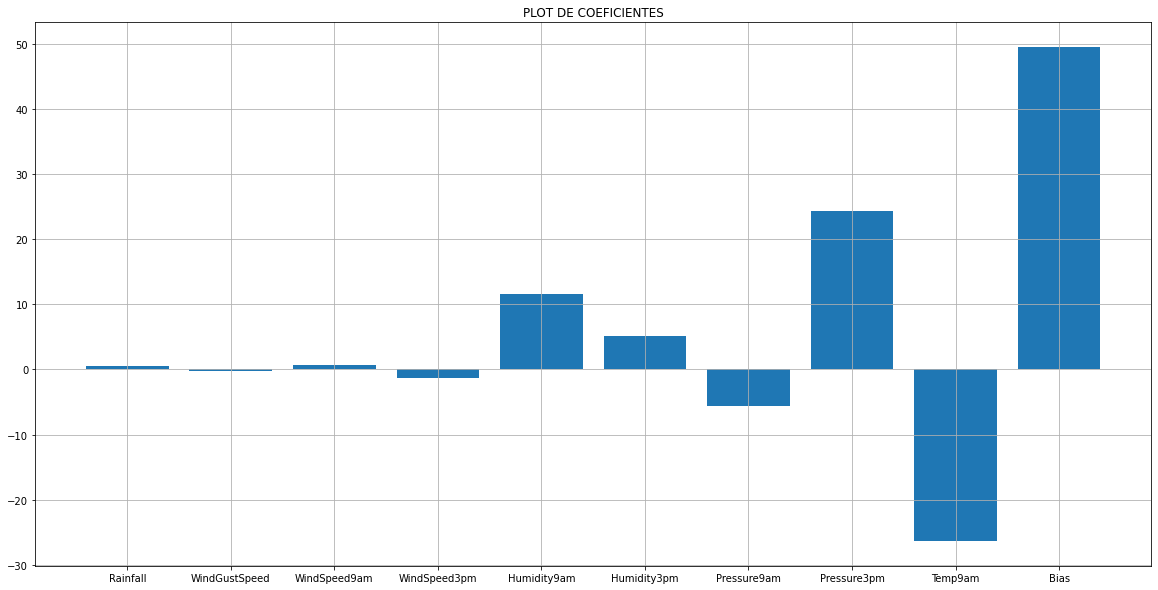

In [202]:
w6 = modelo.coef_
b6 = modelo.intercept_
d6 = x6.shape[1]
plt.figure(figsize=(20,10))
plt.bar(range(d6+1), np.concatenate((w6,[b6])));
labels6 = w_AUS_filtro.columns.values; labels6[-1]= 'Bias'
plt.xticks(range(w6.shape[0]+1), labels6, rotation= 0)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

**OBSERVACIÓN:** Como se observa en el grádico, las variables más influyentes para la predicción son:

*   Temp9am
*   Pressure3pm
*   Humidity9am

<Figure size 432x288 with 0 Axes>

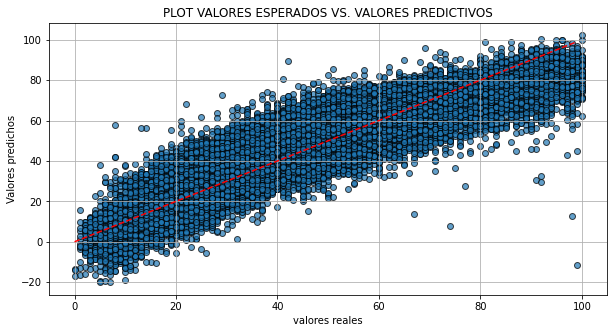

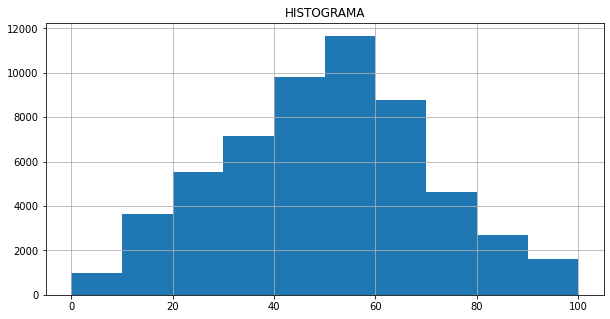

In [204]:
plt.figure()
xx6= range(round(y6.min()),round(y6.max()))
plt.figure(figsize=(10,5));
plt.scatter(y6, y6_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx6, xx6, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

plt.figure(figsize=(10,5));
w_AUS_filtro["Humidity3pm"].hist();
plt.title("HISTOGRAMA");

El modelo predecirá mejor valores entre 20 y 80.

# 7. PRESSURE9AM

In [218]:
x7 = w_AUS_filtro.drop('Pressure9am', axis=1)
y7 = w_AUS_filtro['Pressure9am']
n, d = x7.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

NORMALIZAR= 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x7)  
    x7= scaler.transform(x7)

modelo= LinearRegression()

modelo.fit(x7, y7)

y7_predict= modelo.predict(x7)

mse_error7 = mean_squared_error(y7_predict, y7)
print("Error cuadrático medio: %.2f" % mse_error7)

mae_error7 = mean_absolute_error(y7_predict, y7)
print("Error absoluto medio: %.2f" % mae_error7)

r2_s7 = r2_score(y7, y7_predict)
print("r2_score: %.2f" % r2_s7)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 2.58
Error absoluto medio: 1.21
r2_score: 0.95


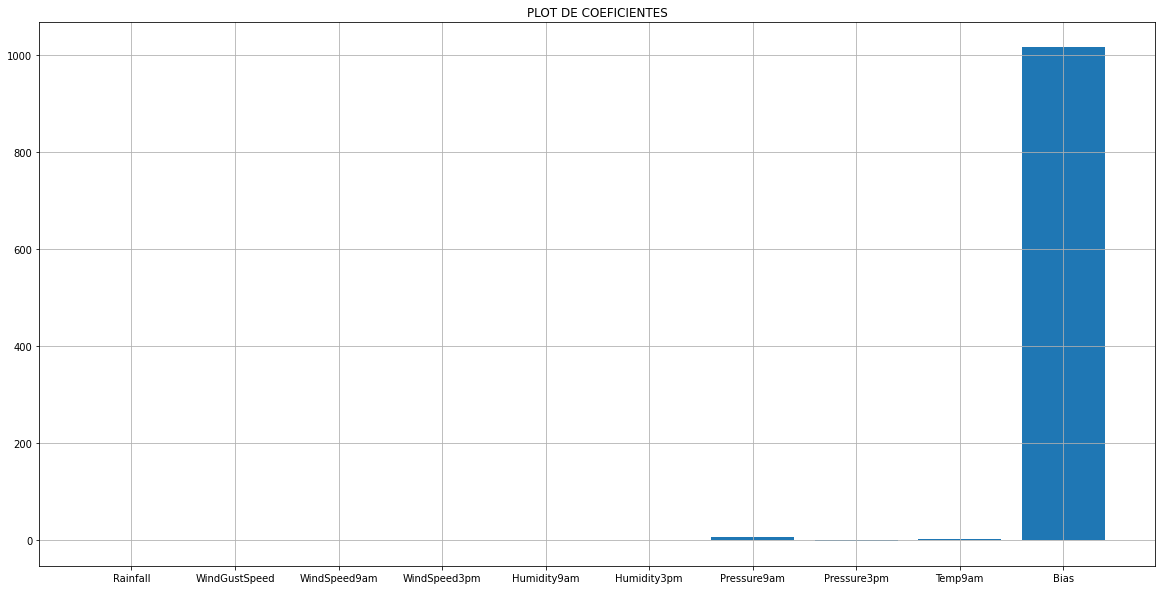

In [219]:
w7 = modelo.coef_
b7 = modelo.intercept_
d7 = x7.shape[1]
plt.figure(figsize=(20,10))
plt.bar(range(d7+1), np.concatenate((w7,[b7])));
labels7 = w_AUS_filtro.columns.values; labels7[-1]= 'Bias'
plt.xticks(range(w7.shape[0]+1), labels7, rotation= 0)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

**OBSERVACIÓN:** Como se observa en el grádico, las variables más influyentes para la predicción son:

*   Pressure9am

<Figure size 432x288 with 0 Axes>

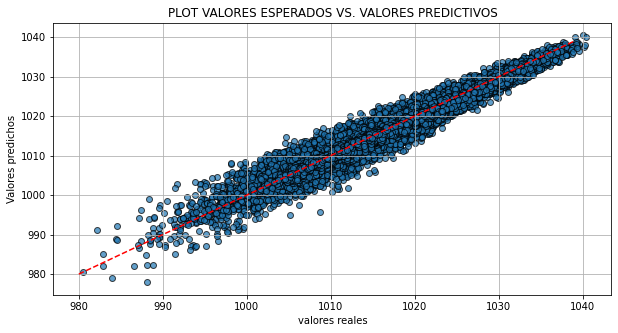

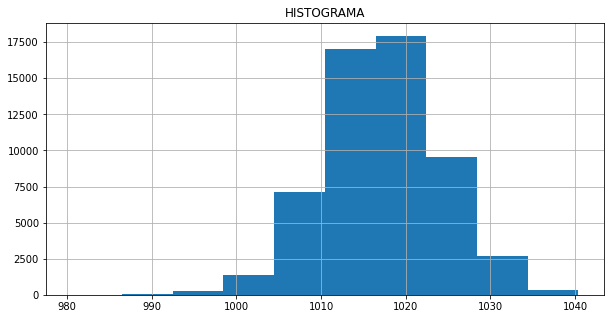

In [221]:
plt.figure()
xx7= range(round(y7.min()),round(y7.max()))
plt.figure(figsize=(10,5));
plt.scatter(y7, y7_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx7, xx7, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

plt.figure(figsize=(10,5));
w_AUS_filtro["Pressure9am"].hist();
plt.title("HISTOGRAMA");

El modelo predecirá mejor valores mayores a 1010 y menores a 1030.

# 8. PRESSURE3PM

In [235]:
x8 = w_AUS_filtro.drop('Pressure3pm', axis=1)
y8 = w_AUS_filtro['Pressure3pm']
n, d = x8.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

NORMALIZAR= 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x8)  
    x8= scaler.transform(x8)

modelo= LinearRegression()

modelo.fit(x8, y8)

y8_predict= modelo.predict(x8)

mse_error8 = mean_squared_error(y8_predict, y8)
print("Error cuadrático medio: %.2f" % mse_error8)

mae_error8 = mean_absolute_error(y8_predict, y8)
print("Error absoluto medio: %.2f" % mae_error8)

r2_s8 = r2_score(y8, y8_predict)
print("r2_score: %.2f" % r2_s8)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 2.53
Error absoluto medio: 1.19
r2_score: 0.95


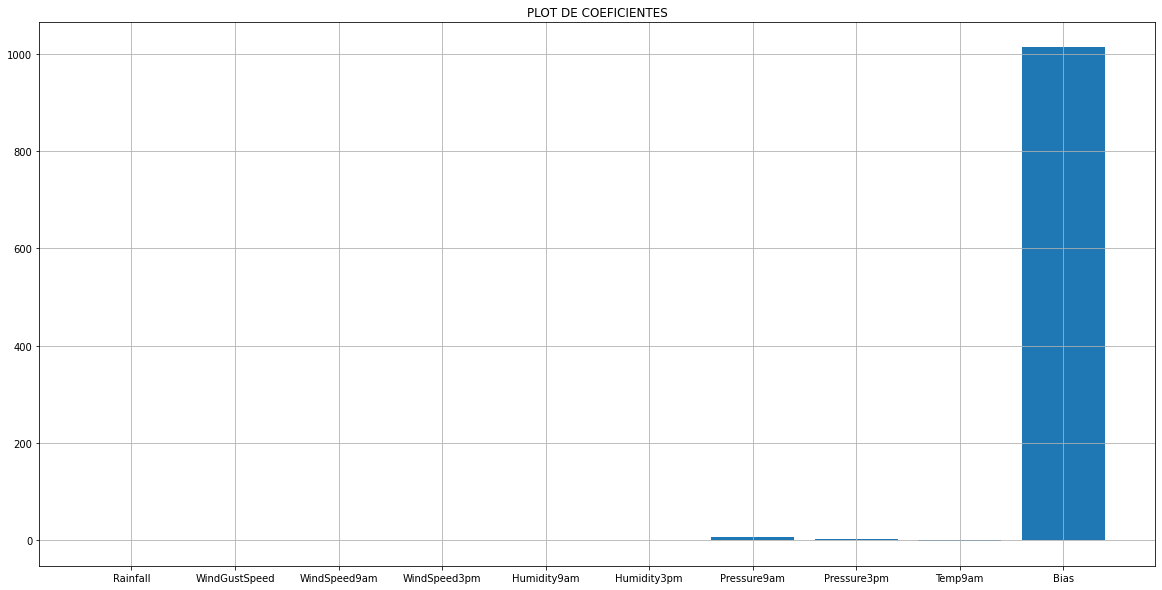

In [236]:
w8 = modelo.coef_
b8 = modelo.intercept_
d8 = x8.shape[1]
plt.figure(figsize=(20,10))
plt.bar(range(d8+1), np.concatenate((w8,[b8])));
labels8 = w_AUS_filtro.columns.values; labels8[-1]= 'Bias'
plt.xticks(range(w8.shape[0]+1), labels8, rotation= 0)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

<Figure size 432x288 with 0 Axes>

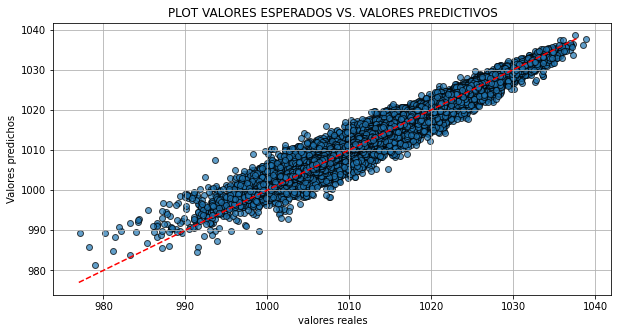

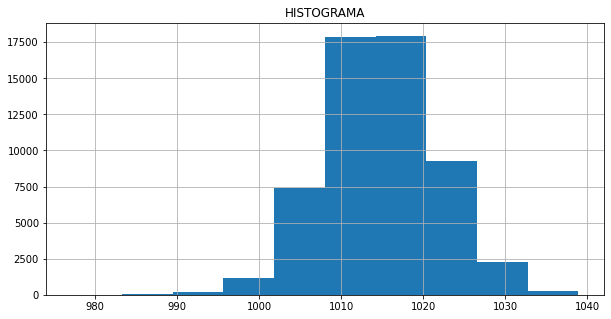

In [238]:
plt.figure()
xx8= range(round(y8.min()),round(y8.max()))
plt.figure(figsize=(10,5));
plt.scatter(y8, y8_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx8, xx8, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

plt.figure(figsize=(10,5));
w_AUS_filtro["Pressure3pm"].hist();
plt.title("HISTOGRAMA");

El modelo predecirá mejor valores mayores a 1010 y menores que 1025.

# 9. TEMP9AM

In [252]:
x9 = w_AUS_filtro.drop('Temp9am', axis=1)
y9 = w_AUS_filtro['Temp9am']
n, d = x9.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

NORMALIZAR= 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x9)  
    x9= scaler.transform(x9)

modelo= LinearRegression()

modelo.fit(x9, y9)

y9_predict= modelo.predict(x9)

mse_error9 = mean_squared_error(y9_predict, y9)
print("Error cuadrático medio: %.2f" % mse_error9)

mae_error9 = mean_absolute_error(y9_predict, y9)
print("Error absoluto medio: %.2f" % mae_error9)

r2_s9 = r2_score(y9, y9_predict)
print("r2_score: %.2f" % r2_s9)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 3.01
Error absoluto medio: 1.34
r2_score: 0.93


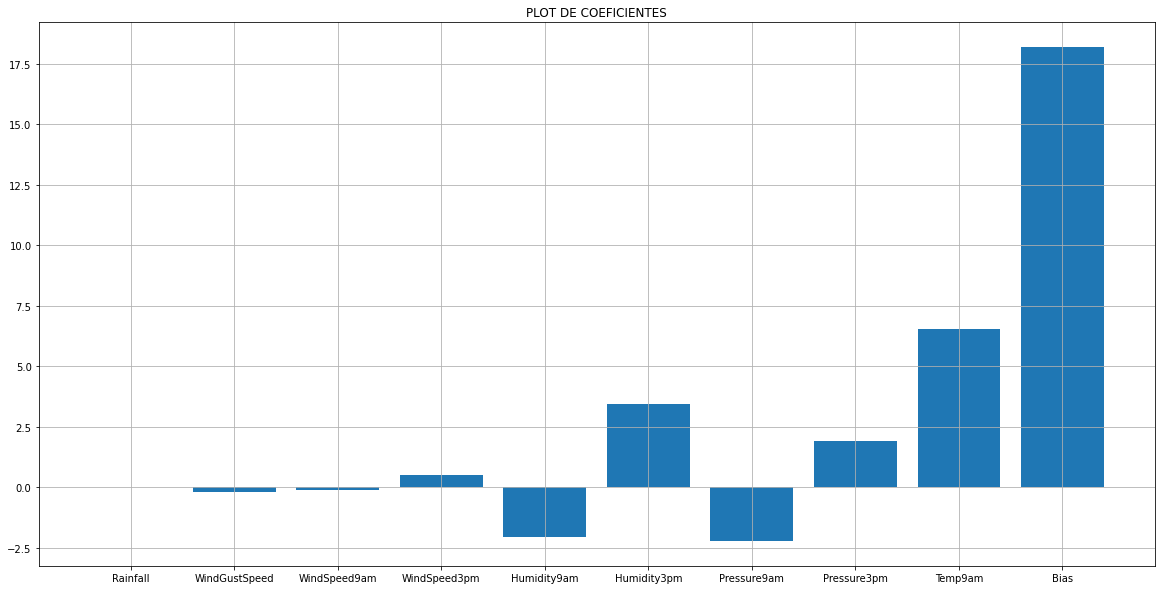

In [253]:
w9 = modelo.coef_
b9 = modelo.intercept_
d9 = x9.shape[1]
plt.figure(figsize=(20,10))
plt.bar(range(d9+1), np.concatenate((w9,[b9])));
labels9 = w_AUS_filtro.columns.values; labels9[-1]= 'Bias'
plt.xticks(range(w9.shape[0]+1), labels9, rotation= 0)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

**OBSERVACIÓN:** Como se observa en el grádico, las variables más influyentes para la predicción son:

*   Temp9am
*   Humidity3pm
*   Humidity9am
*   Pressure9am

<Figure size 432x288 with 0 Axes>

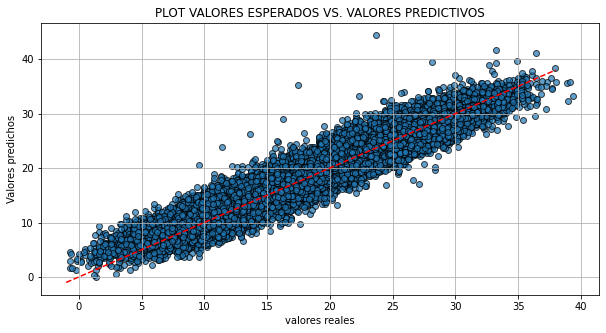

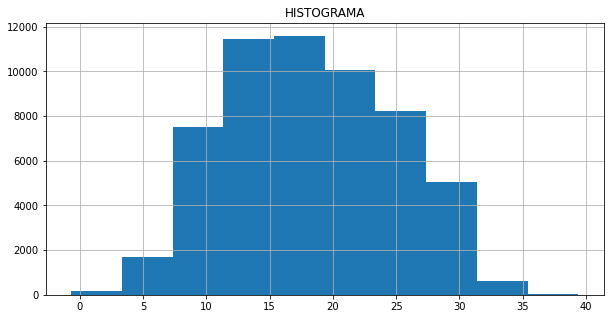

In [255]:
plt.figure()
xx9= range(round(y9.min()),round(y9.max()))
plt.figure(figsize=(10,5));
plt.scatter(y9, y9_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx9, xx9, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

plt.figure(figsize=(10,5));
w_AUS_filtro["Temp9am"].hist();
plt.title("HISTOGRAMA");

El modelo predecirá mejor aqueloos valores que se encuentren entre 5 y 30.

# 10. TEMP3PM

In [269]:
x10 = w_AUS_filtro.drop('Temp3pm', axis=1)
y10 = w_AUS_filtro['Temp3pm']
n, d = x10.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

NORMALIZAR= 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x10)  
    x10= scaler.transform(x10)

modelo= LinearRegression()

modelo.fit(x10, y10)

y10_predict= modelo.predict(x10)

mse_error10 = mean_squared_error(y10_predict, y10)
print("Error cuadrático medio: %.2f" % mse_error10)

mae_error10 = mean_absolute_error(y10_predict, y10)
print("Error absoluto medio: %.2f" % mae_error10)

r2_s10 = r2_score(y10, y10_predict)
print("r2_score: %.2f" % r2_s10)

El dataset tiene 56420 registros, de 9 dimensiones
Error cuadrático medio: 2.86
Error absoluto medio: 1.30
r2_score: 0.94


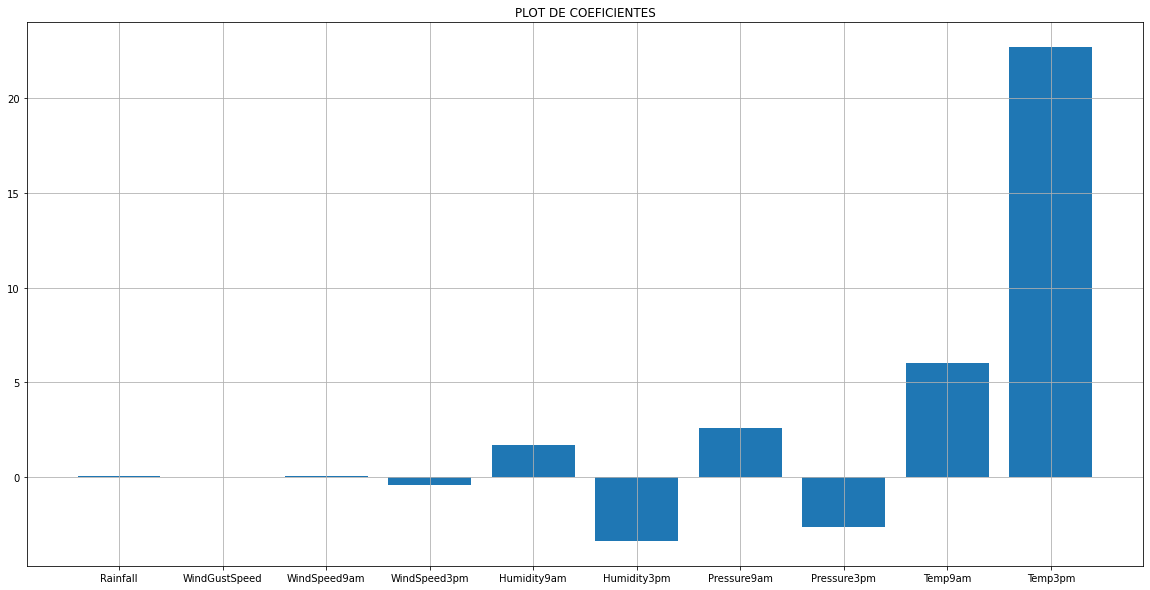

In [270]:
w10 = modelo.coef_
b10 = modelo.intercept_
d10 = x10.shape[1]
plt.figure(figsize=(20,10))
plt.bar(range(d10+1), np.concatenate((w10,[b10])));
labels10 = w_AUS_filtro.columns.values; labels9[-1]= 'Bias'
plt.xticks(range(w10.shape[0]+1), labels10, rotation= 0)
plt.grid()
plt.title("PLOT DE COEFICIENTES");

**OBSERVACIÓN:** Como se observa en el grádico, las variables más influyentes para la predicción son:

*   Temp9am
*   Humidity3pm
*   Pressure3pm
*   Pressure9am

<Figure size 432x288 with 0 Axes>

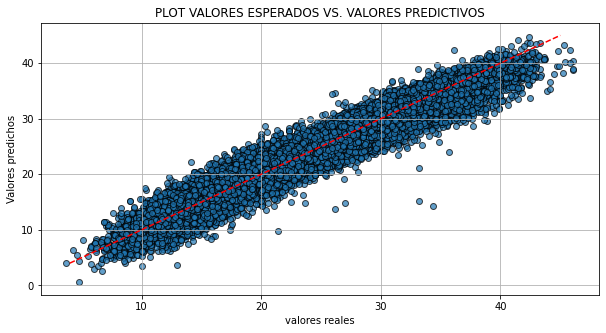

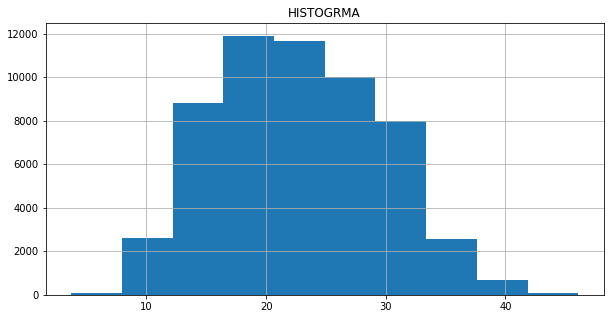

In [272]:
plt.figure()
xx10= range(round(y10.min()),round(y10.max()))
plt.figure(figsize=(10,5));
plt.scatter(y10, y10_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx10, xx10, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos");
plt.title("PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS");

plt.figure(figsize=(10,5));
w_AUS_filtro["Temp3pm"].hist();
plt.title("HISTOGRMA");

El modelo predecirá mejor aquellos valores que se encuentren entre 15 y 35.